### Examen de certificación – Intento 1
## Examen de cinturón AML – Opción C

### Descripción del examen:
En este examen, trabajarás con un dataset de mayor complejidad, aplicando un análisis no supervisado utilizando K-means o PCA para identificar patrones ocultos y luego utilizando un modelo Perceptrón Multicapa (MLP) para realizar predicciones. El examen se centrará en extraer características clave de los datos y aplicar técnicas avanzadas de modelado para realizar predicciones precisas.

### Dataset:
El dataset utilizado es el «Human Activity Recognition with Smartphones Dataset», que contiene datos recogidos de acelerómetros en smartphones mientras los usuarios realizan actividades cotidianas. El objetivo es clasificar el tipo de actividad física basándose en datos sensoriales de múltiples ejes.
Enlace al dataset: https://www.kaggle.com/uciml/human-activity-recognition-with-smartphones

### Instrucciones:
1. Exploración y preprocesamiento de datos:
* Carga y explora el dataset, identificando las variables relacionadas con los datos sensoriales. Este conjunto de datos incluye lecturas de aceleración en los ejes X, Y y Z mientras los sujetos realizan actividades como caminar, correr, y subir escaleras.
* Asegúrate de manejar cualquier valor nulo, normalizando las lecturas sensoriales para mejorar el rendimiento del análisis y el modelado posterior.

2. Análisis no supervisado:
* Selecciona un enfoque de análisis no supervisado: K-means o PCA.
* K-means: Utiliza K-means para agrupar las actividades de los usuarios en clusters y analiza si los grupos corresponden a los tipos de actividad física.
* PCA: Si eliges PCA, realiza una reducción de dimensionalidad para identificar los componentes principales que explican la mayor variabilidad en los datos sensoriales. Visualiza los datos en el espacio reducido de los componentes principales.

3. Modelado con MLP:
* Desarrolla un modelo MLP para predecir el tipo de actividad física realizada por los usuarios basándose en los datos sensoriales.
* Divide el dataset en conjuntos de entrenamiento y prueba, asegurándote de que las distintas actividades estén bien representadas en ambos conjuntos.
* Configura la arquitectura del MLP, utilizando al menos dos capas ocultas, y ajusta hiperparámetros como el tamaño del batch, el número de épocas y la tasa de aprendizaje.

4. Evaluación del modelo:
* Evalúa el rendimiento del MLP utilizando métricas como la precisión, el recall, el F1-score y la matriz de confusión. Discute si el modelo es capaz de predecir correctamente las distintas actividades físicas.
* Visualiza las curvas de aprendizaje, mostrando cómo evoluciona la pérdida y la precisión a lo largo del entrenamiento.

5. Discusión y análisis:
* Reflexiona sobre los resultados del análisis no supervisado. ¿El análisis de clusters o PCA proporcionó insights útiles sobre las actividades? ¿Qué características son más importantes para clasificar las actividades físicas?
* Discute el rendimiento del MLP y cómo podría mejorarse. ¿Es adecuado este enfoque para predecir actividades basadas en datos sensoriales?

6. Entrega final:
* Entrega un informe detallado que incluya todas las etapas del examen: preprocesamiento de datos, análisis no supervisado, modelado MLP, evaluación y conclusiones. Apoya tu informe con visualizaciones que demuestren los resultados obtenidos.

***
### Desarrollo del examen
* Importamos las librerias a utilizar
* Cargamos el dataset

In [114]:
# Flag para desactivar los warnings en las cells oputputs
import warnings
warnings.filterwarnings('ignore')

# Importar Librerias a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import time

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, RobustScaler
from sklearn.metrics import silhouette_score, accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [2]:
# Descargamos el dataset indicado para el examen y lo cargamos en una variable
df = pd.read_csv('../data/examen_3/train.csv')
# Revisamos las primeras columnas para corroborar que cargo bien el dataset
df.head(5)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


### Exploración inicial del dataset
Buscamos conocer:
* Cantidad de filas y columnas
* Tipos de datos de las columnas
* Cantidad de nulos por columna
* Una exploración inicial de las variables estadísticas

In [29]:
# Cantidad de Filas y Columnas
print(f'(CantRow, CantColumn):\n{df.shape}\n')

# Revisar tipos de datos
print(f'Tipos de Datos de las columnas:\n{df.dtypes}\n')

# Contamos cuantos valores nulos existen por columna
cantNulos =  df.isnull().sum().sum()
cantNulosPorColumna = df.isnull().sum()
print(f'Valores nulos en el Dataset: {cantNulos}\n\nValores nulos por columna:\n{cantNulosPorColumna}\n')

# Exploramos las estadisticas del dataset completo. Usamos .T Para verificar los datos de una forma mas cómoda
descripcionDataset = df.describe()
print(f'Distribución estadística de los datos:\n{descripcionDataset}\n')

# Revisar la distribución de la columna objetivo (Activity)
print(f'Valores de la columna objetivo: {df['Activity'].value_counts()}')

(CantRow, CantColumn):
(7352, 563)

Tipos de Datos de las columnas:
tBodyAcc-mean()-X       float64
tBodyAcc-mean()-Y       float64
tBodyAcc-mean()-Z       float64
tBodyAcc-std()-X        float64
tBodyAcc-std()-Y        float64
                         ...   
angle(X,gravityMean)    float64
angle(Y,gravityMean)    float64
angle(Z,gravityMean)    float64
subject                   int64
Activity                 object
Length: 563, dtype: object

Valores nulos en el Dataset: 0

Valores nulos por columna:
tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64

Distribución estadística de los datos:
       tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
count        7352.000000        7352.000000        7352.000000   
mean     

In [33]:
# Función para graficar outliers
def generar_grafico_outliers(dataframe, columnas_por_grupo=10):
    num_columnas = dataframe.shape[1]
    grupos = [dataframe.columns[i:i+columnas_por_grupo] for i in range(0, num_columnas, columnas_por_grupo)]

    # Recorremos cada grupo de columnas
    for i, grupo in enumerate(grupos):
        num_subplots = len(grupo)
        fig, axes = plt.subplots(1, num_subplots, figsize=(num_subplots * 4, 5))
        fig.suptitle(f'Boxplots de columnas {i * columnas_por_grupo + 1} a {i * columnas_por_grupo + num_subplots}', fontsize=14)

        # Si solo hay una columna en el grupo
        if num_subplots == 1:
            sns.boxplot(y=dataframe[grupo[0]], ax=axes)
            axes.set_title(grupo[0])
        else:
            for ax, col in zip(axes, grupo):
                sns.boxplot(y=dataframe[col], ax=ax)
                ax.set_title(col)

        # Guardar la figura
        nombre_archivo = f"Outliers_boxplot_{i}.png"
        ruta_completa = os.path.join('../data/examen_3/graficos/', nombre_archivo)
        plt.savefig(ruta_completa)
        plt.close()

# Llamada a la función
generar_grafico_outliers(df)

**Los gráficos de outliers fueron guardados en la carpeta /data/examen_3/graficos/ para no hacer extenso el notebook**
***
### Primeras conclusiones del dataset
* Todas las columnas son numéricas (float, int), excepto la variable objetivo.
* No existen valores nulos ni faltantes en el dataset.
* En muchas columnas existen outliers, pero en vez de tratarlos de una forma específica para cada caso, lo que voy a hacer es escalarlos para normalizarlos

**_Vamos a normalizar escalando con StandardScaler y RobustScaler para despues poder comparar el rendimiento_**

In [34]:
# Separamos las caracteristicas (X) y etiquetamos la variable objetivo (y)
X = df.drop(columns=['Activity'])  # Características
y = df['Activity']                 # Columna objetivo

In [75]:
# Convertir etiquetas a números usando LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Ahora y_encoded tendrá valores numéricos (por ejemplo, 0, 1, 2, etc.)
# También podemos ver el mapeo entre las etiquetas originales y los números
print("Etiquetas originales: ", label_encoder.classes_)
print("Etiquetas codificadas: ", y_encoded)

Etiquetas originales:  ['LAYING' 'SITTING' 'STANDING' 'WALKING' 'WALKING_DOWNSTAIRS'
 'WALKING_UPSTAIRS']
Etiquetas codificadas:  [2 2 2 ... 5 5 5]


In [77]:
# Creamos 2 funciones para normalizar los datos y despues poder compararlos
def normalizar_con_standard_scaler(X):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    return X_scaled

def normalizar_con_robust_scaler(X):
    scaler = RobustScaler()
    X_scaled = scaler.fit_transform(X)
    return X_scaled

In [76]:
# Dividimos los datos en un conjunto de entrenamiento (80%) y en conjunto de pruebas (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42)

In [79]:
# StandardScaler
X_train_standard = normalizar_con_standard_scaler(X_train)
X_test_standard = normalizar_con_standard_scaler(X_test)

# RobustScaler
X_train_robust = normalizar_con_robust_scaler(X_train)
X_test_robust = normalizar_con_robust_scaler(X_test)

***
**Aparte de comparar ambas normalizaciones, vamos a comparar:**
* Entrenando utilizando solo PCA
* Entrenando utilizando solo KMeans
* Aplicando ambas técnicas. (Primero PCA y luego KMeans)

**Pero antes de aplicar el PCA y el Kmeans, obtendremos los valores optimos para cada uno**

Obtenemos los componentes óptimos para cada PCA

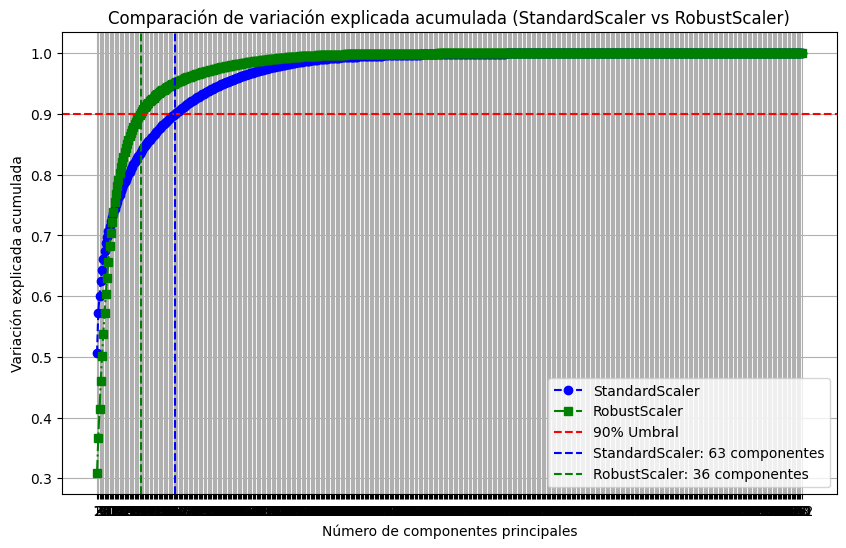

Umbral del 90% para ambos. Resultado:
Cantidad de componentes principales para StandardScaler:63
Cantidad de componentes principales para RobustScaler:36


In [80]:
# PCA para X_train_standard
pca_standard = PCA(n_components=562)
pca_standard.fit(X_train_standard)
explained_variance_cumulative_standard = np.cumsum(pca_standard.explained_variance_ratio_)

# PCA para X_train_robust
pca_robust = PCA(n_components=562)
pca_robust.fit(X_train_robust)
explained_variance_cumulative_robust = np.cumsum(pca_robust.explained_variance_ratio_)

# Umbral del 90% para ambos
threshold = 0.9
optimal_components_standard = np.argmax(explained_variance_cumulative_standard >= threshold) + 1
optimal_components_robust = np.argmax(explained_variance_cumulative_robust >= threshold) + 1

# Graficar ambas curvas en la misma figura
plt.figure(figsize=(10, 6))

# Curva para StandardScaler
plt.plot(range(1, 563), explained_variance_cumulative_standard, marker='o', linestyle='--', label='StandardScaler', color='b')

# Curva para RobustScaler
plt.plot(range(1, 563), explained_variance_cumulative_robust, marker='s', linestyle='-.', label='RobustScaler', color='g')

# Marcar el umbral del 90% como referencia
plt.axhline(y=threshold, color='r', linestyle='--', label='90% Umbral')
plt.axvline(x=optimal_components_standard, color='b', linestyle='--', label=f'StandardScaler: {optimal_components_standard} componentes')
plt.axvline(x=optimal_components_robust, color='g', linestyle='--', label=f'RobustScaler: {optimal_components_robust} componentes')

# Configuración del gráfico
plt.title('Comparación de variación explicada acumulada (StandardScaler vs RobustScaler)')
plt.xlabel('Número de componentes principales')
plt.ylabel('Variación explicada acumulada')
plt.xticks(range(1, 563))
plt.grid(True)
plt.legend()
# Guardar la figura
nombre_archivo_pca = "PCA_Analisis_Componentes.png"
ruta_completa_pca = os.path.join('../data/examen_3/graficos/', nombre_archivo_pca)
plt.savefig(ruta_completa_pca)
plt.show()

print(f'Umbral del 90% para ambos. Resultado:\nCantidad de componentes principales para StandardScaler:{optimal_components_standard}')
print(f'Cantidad de componentes principales para RobustScaler:{optimal_components_robust}')

# Para ver el detalle, se puede descomentar el sgte bloque de codigo
# Mostrar la varianza explicada acumulada para ambos casos
# print("\nVariación explicada acumulada - StandardScaler:")
# for i, variance in enumerate(explained_variance_cumulative_standard, 1):
#     print(f"Componente {i}: {variance:.2%}")

# print("\nVariación explicada acumulada - RobustScaler:")
# for i, variance in enumerate(explained_variance_cumulative_robust, 1):
#     print(f"Componente {i}: {variance:.2%}")


Aplicar PCA para ambos datos de entrenamiento

In [90]:
# Aplicar PCA para X_train_standard y X_test_standard
pca_standard = PCA(n_components=63)
X_pca_standard = pca_standard.fit_transform(X_train_standard)
X_test_pca_standard = pca_standard.transform(X_test_standard)

explaned_X_pca_standard = pca_standard.explained_variance_ratio_.sum()
print(f"Varianza explicada total con 63 componentes: {explaned_X_pca_standard:.2%}")
print(f"Dimensiones originales: {X_train_standard.shape[1]}")
print(f"Dimensiones reducidas: {X_pca_standard.shape[1]}")

# Aplicar PCA para X_train_robust y X_test_robust
pca_robust = PCA(n_components=36)
X_pca_robust = pca_robust.fit_transform(X_train_robust)
X_test_pca_robust = pca_robust.fit_transform(X_test_robust)

explaned_X_pca_robust = pca_robust.explained_variance_ratio_.sum()
print(f"Varianza explicada total con 36 componentes: {explaned_X_pca_robust:.2%}")
print(f"Dimensiones originales: {X_train_robust.shape[1]}")
print(f"Dimensiones reducidas: {X_pca_robust.shape[1]}")

Varianza explicada total con 63 componentes: 90.03%
Dimensiones originales: 562
Dimensiones reducidas: 63
Varianza explicada total con 36 componentes: 92.40%
Dimensiones originales: 562
Dimensiones reducidas: 36


Obtenemos las cantidades óptimas de clusteres para cada KMeans

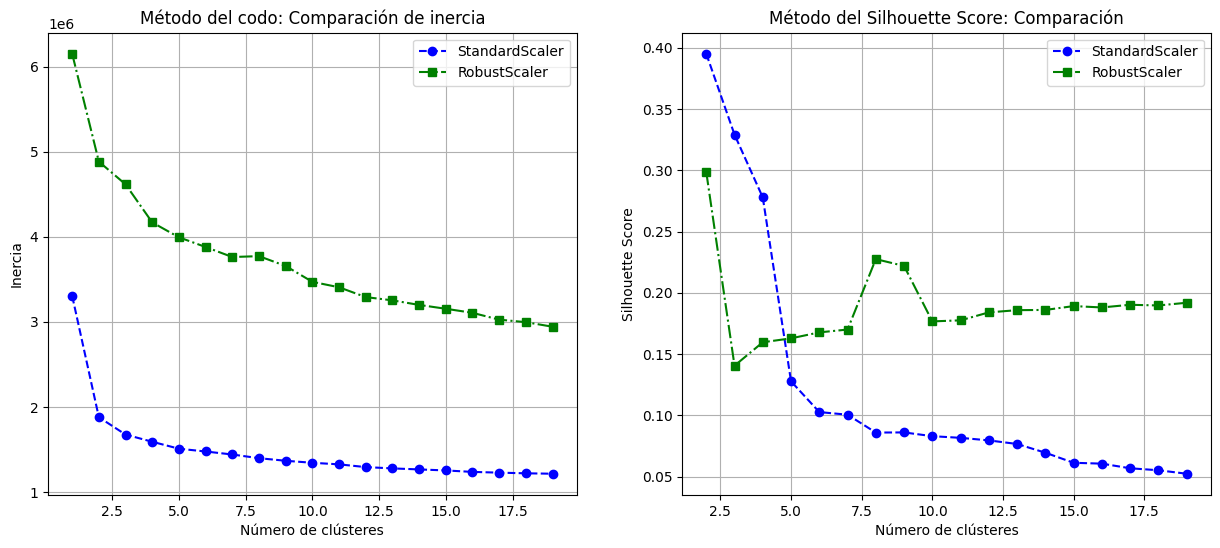

Método del codo:
  Para X_train_standard, el número óptimo de clústeres según el codo es: 1
  Para X_train_robust, el número óptimo de clústeres según el codo es: 1

Método del Silhouette Score:
  Para X_train_standard, el número óptimo de clústeres según el Silhouette Score es: 3
  Para X_train_robust, el número óptimo de clústeres según el Silhouette Score es: 3


In [82]:
# Definir una función para calcular la inercia (método del codo)
def kmeans_metodos_evaluacion(X, n_range=range(1, 20)):
    inertia = []  # Lista para almacenar la inercia
    silhouette_scores = []  # Lista para almacenar los Silhouette Scores
    
    for n_clusters in n_range:
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        kmeans.fit(X)
        inertia.append(kmeans.inertia_) # Calcular la inercia (within-cluster sum of squares)
        
        # Calcular el Silhouette Score (solo si hay más de 1 clúster)
        if n_clusters > 1:
            score = silhouette_score(X, kmeans.labels_)
        else:
            score = -1  # El Silhouette Score no es válido para 1 clúster
        silhouette_scores.append(score)
        
    
    return inertia, silhouette_scores

# Aplicar el método del codo para ambos conjuntos de datos
inertia_standard, silhouette_standard = kmeans_metodos_evaluacion(X_train_standard)
inertia_robust, silhouette_robust = kmeans_metodos_evaluacion(X_train_robust)

print()

# Graficar ambos, Inercia y Silhouette Score, para ambos conjuntos de datos
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico de Inercia
axes[0].plot(range(1, 20), inertia_standard, marker='o', linestyle='--', label='StandardScaler', color='b')
axes[0].plot(range(1, 20), inertia_robust, marker='s', linestyle='-.', label='RobustScaler', color='g')
axes[0].set_title('Método del codo: Comparación de inercia')
axes[0].set_xlabel('Número de clústeres')
axes[0].set_ylabel('Inercia')
axes[0].legend()
axes[0].grid(True)

# Gráfico de Silhouette Score
axes[1].plot(range(2, 20), silhouette_standard[1:], marker='o', linestyle='--', label='StandardScaler', color='b')
axes[1].plot(range(2, 20), silhouette_robust[1:], marker='s', linestyle='-.', label='RobustScaler', color='g')
axes[1].set_title('Método del Silhouette Score: Comparación')
axes[1].set_xlabel('Número de clústeres')
axes[1].set_ylabel('Silhouette Score')
axes[1].legend()
axes[1].grid(True)

# Guardar la figura
nombre_archivo_kmeans = "KMeans_Codo_Silhouette_Method.png"
ruta_completa_kmeans = os.path.join('../data/examen_3/graficos/', nombre_archivo_kmeans)
plt.savefig(ruta_completa_kmeans)

# Mostrar la figura
plt.show()


# Identificar el "codo" (número óptimo de clústeres para el codo)
optimal_clusters_elbow_standard = np.argmin(np.diff(inertia_standard)) + 1
optimal_clusters_elbow_robust = np.argmin(np.diff(inertia_robust)) + 1

# Identificar el número óptimo basado en el Silhouette Score
optimal_clusters_silhouette_standard = np.argmax(silhouette_standard) + 2  # +2 porque empezamos desde 2 clústeres
optimal_clusters_silhouette_robust = np.argmax(silhouette_robust) + 2

# Imprimir los resultados
print("Método del codo:")
print(f"  Para X_train_standard, el número óptimo de clústeres según el codo es: {optimal_clusters_elbow_standard}")
print(f"  Para X_train_robust, el número óptimo de clústeres según el codo es: {optimal_clusters_elbow_robust}")

print("\nMétodo del Silhouette Score:")
print(f"  Para X_train_standard, el número óptimo de clústeres según el Silhouette Score es: {optimal_clusters_silhouette_standard}")
print(f"  Para X_train_robust, el número óptimo de clústeres según el Silhouette Score es: {optimal_clusters_silhouette_robust}")


**Resultados del análisis para KMeans:**
* El método del codo, sugiere 1 clúster para ambos datos de entrenamiento. Esto podría indicar que no hay una estructura significativa de clústeres, lo que puede ser señal de que el KMeans no es adecuado para este tipo de datos.
* El Silhouette Score indica que 3 clústeres son los mejores, esto es una indicación de que la mejor agrupación de los datos se logra con 3 clústeres, aunque el codo sugiera que no hay una estructura clara.
Por lo tanto, a pesar de que el codo sugiera 1 clúster, el Silhouette Score es una medida más confiable en cuanto a la calidad de agrupamiento. Por lo tanto, aplicaremos el KMeans con 3 clústeres.

Aplicamos KMeans para ambos datos de entrenamiento

In [106]:
# Despues del análisis anterior, elegimos 3 clusteres
optimal_clusters_standard = 3
optimal_clusters_robust = 3

# Aplicar KMeans con el número óptimo de clústeres para StandardScaler
kmeans_standard = KMeans(n_clusters=optimal_clusters_standard, random_state=42)
kmeans_standard.fit(X_train_standard)
train_clusters_standard = kmeans_standard.predict(X_train_standard)
test_clusters_standard = kmeans_standard.predict(X_test_standard)
# Agregar las etiquetas de los clusters como características
X_train_kmeans_standard = np.column_stack((X_train_standard, train_clusters_standard))
X_test_kmeans_standard = np.column_stack((X_test_standard, test_clusters_standard))

# Aplicar KMeans con el número óptimo de clústeres para RobustScaler
kmeans_robust = KMeans(n_clusters=optimal_clusters_robust, random_state=42)
kmeans_robust.fit(X_train_robust)
train_clusters_robust = kmeans_robust.predict(X_train_robust)
test_clusters_robust = kmeans_robust.predict(X_test_robust)

# Agregar las etiquetas de los clusters como características
X_train_kmeans_robust = np.column_stack((X_train_robust, train_clusters_robust))
X_test_kmeans_robust = np.column_stack((X_test_robust, test_clusters_robust))


# Mostrar los resultados de los clústeres obtenidos
print('kmeans_standard:')
print(f"Etiquetas de clúster: {train_clusters_standard}")
print(f"Distribución de puntos en los clústeres: {np.bincount(train_clusters_standard)}")
silhouette_standard = silhouette_score(X_train_standard, train_clusters_standard)
print(f"Silhouette Score: {silhouette_standard}")

print('\nkmeans_robust:')
print(f"Etiquetas de clúster: {train_clusters_robust}")
print(f"Distribución de puntos en los clústeres: {np.bincount(train_clusters_robust)}")
silhouette_robust = silhouette_score(X_train_robust, train_clusters_robust)
print(f"Silhouette Score: {silhouette_robust}")

kmeans_standard:
Etiquetas de clúster: [2 0 2 ... 1 0 2]
Distribución de puntos en los clústeres: [3233  752 1896]
Silhouette Score: 0.32907046856225963

kmeans_robust:
Etiquetas de clúster: [0 2 1 ... 1 2 0]
Distribución de puntos en los clústeres: [2977 1741 1163]
Silhouette Score: 0.140551840180827


**Visualizamos los K-Means generados**

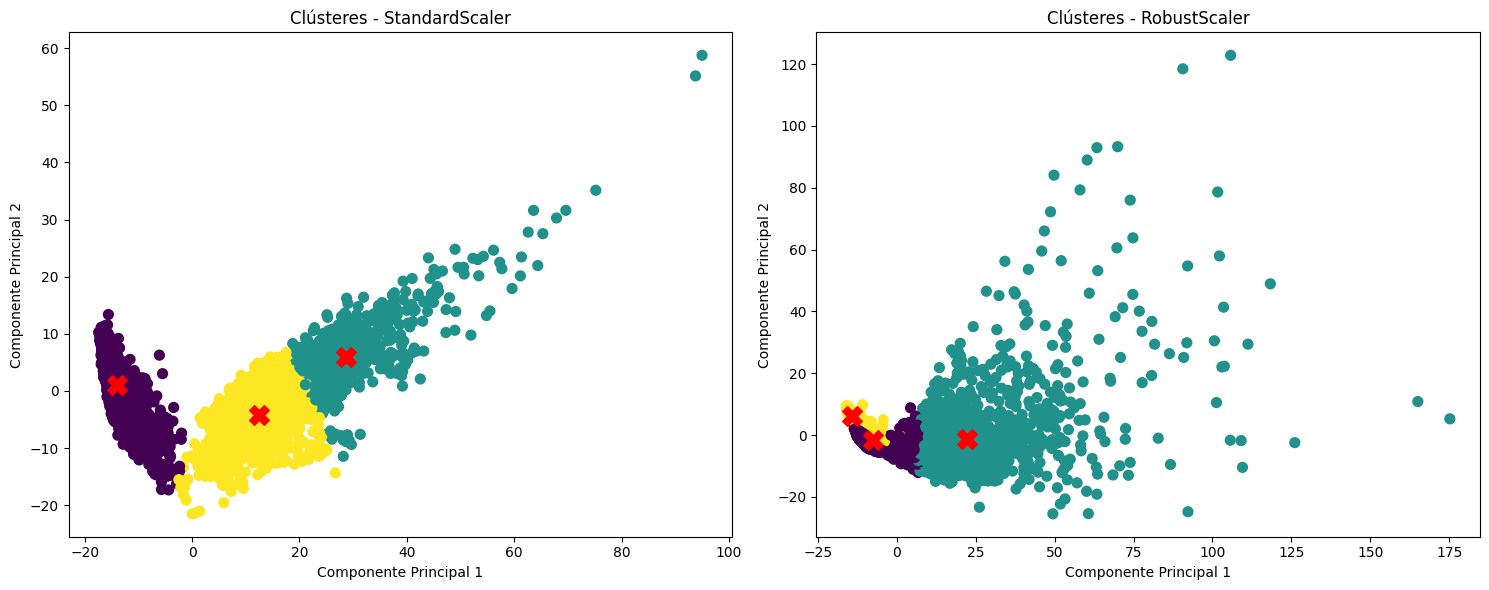

In [107]:
# Creamos 2 variables temporales para reducir los datos a 2D usando PCA
pca_standard_tmp = PCA(n_components=2)
X_train_standard_2D = pca_standard_tmp.fit_transform(X_train_standard)

pca_robust_tmp = PCA(n_components=2)
X_train_robust_2D = pca_robust_tmp.fit_transform(X_train_robust)

# Crear subgráficos (2 columnas en 1 fila)
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Visualización de los clústeres para StandardScaler
axes[0].scatter(X_train_standard_2D[:, 0], X_train_standard_2D[:, 1], c=labels_standard, s=50, cmap='viridis')
# Calcular los centroides de los 3 clústeres para StandardScaler
centroids_standard = np.array([X_train_standard_2D[labels_standard == i].mean(axis=0) for i in range(optimal_clusters_standard)])
# Marcar los centroides con un 'X' roja
axes[0].scatter(centroids_standard[:, 0], centroids_standard[:, 1], s=200, c='red', marker='X', label='Centroides')
axes[0].set_title("Clústeres - StandardScaler")
axes[0].set_xlabel("Componente Principal 1")
axes[0].set_ylabel("Componente Principal 2")

# Visualización de los clústeres para RobustScaler
axes[1].scatter(X_train_robust_2D[:, 0], X_train_robust_2D[:, 1], c=labels_robust, s=50, cmap='viridis')
# Calcular los centroides de los 3 clústeres para RobustScaler
centroids_robust = np.array([X_train_robust_2D[labels_robust == i].mean(axis=0) for i in range(optimal_clusters_robust)])
# Marcar los centroides con un 'X' roja
axes[1].scatter(centroids_robust[:, 0], centroids_robust[:, 1], s=200, c='red', marker='X', label='Centroides')
axes[1].set_title("Clústeres - RobustScaler")
axes[1].set_xlabel("Componente Principal 1")
axes[1].set_ylabel("Componente Principal 2")

# Ajustar el espacio entre los subgráficos
plt.tight_layout()

# Guardar la figura
nombre_archivo_kmeans_2D = "KMeans_Show_2s.png"
ruta_completa_kmeans_2D = os.path.join('../data/examen_3/graficos/', nombre_archivo_kmeans_2D)
plt.savefig(ruta_completa_kmeans_2D)

# Mostrar el gráfico
plt.show()

***
**Ahora es el turno de entrenar el MLP**
Tener en cuenta que queremos seguir comparando ambos modelos de Normalización. Eso da lugar a 6 iteraciones de entrenamiento para luego compararlos.
* StandardScaler.
* RobustScaler.
* PCA: Con StandardScaler.
* PCA: Con RobustScaler.
* KMeans: Con StandardScaler
* KMeans: Con RobustScaler.

1. Creamos una función para crear el mismo modelo las veces que necesitemos:

In [108]:
def crear_mlp(input_shape):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(input_shape,)),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(6, activation='softmax')  # 6 clases para la columna 'Activity'
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

2. Creamos una función para entrenar y evaluar los modelos

In [115]:
# Entrenamiento y evaluación del modelo para cada conjunto de datos
def entrenar_y_evaluar(model, X_train, y_train, X_test, y_test, scaler_name):
    start_time = time.time()  # Iniciar el temporizador
    print(f"Entrenando modelo con {scaler_name}...")

    history = model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)
    
    # Calcular el tiempo de entrenamiento
    end_time = time.time()
    training_time = end_time - start_time

    # Evaluar en datos de prueba
    y_pred = np.argmax(model.predict(X_test), axis=1)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f"Accuracy con {scaler_name}: {accuracy}")
    print(f"Precisión con {scaler_name}: {precision}")
    print(f"Recall con {scaler_name}: {recall}")
    print(f"F1-score con {scaler_name}: {f1}")
    print(classification_report(y_test, y_pred))
    
    # Calcular la matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.xlabel('Predicción')
    plt.ylabel('Real')
    plt.title(f'Matriz de Confusión - {scaler_name}')
    
    # Guardar la figura
    nombre_archivo_modelo = f"MatrizConfusion_{scaler_name}.png"
    ruta_completa_modelo = os.path.join('../data/examen_3/graficos/', nombre_archivo_modelo)
    plt.savefig(ruta_completa_modelo)
    
    plt.show()

    # Guardar el historial y las métricas en el retorno
    return history, accuracy, precision, recall, f1, training_time

3. Creamos una función para graficar las curvas de aprendizaje

In [119]:
# Graficar las curvas de aprendizaje
def graficar_curvas_aprendizaje(history_standard, history_robust, history_pca_standard, history_pca_robust, history_kmeans_standard, history_kmeans_robust):
    # Crear subgráficos para las curvas de precisión y pérdida
    fig, axes = plt.subplots(2, 1, figsize=(10, 10))

    # Curvas de precisión
    axes[0].plot(history_standard.history['accuracy'], label='StandardScaler')
    axes[0].plot(history_robust.history['accuracy'], label='RobustScaler')
    axes[0].plot(history_pca_standard.history['accuracy'], label='PCA Standard')
    axes[0].plot(history_pca_robust.history['accuracy'], label='PCA Robust')
    axes[0].plot(history_kmeans_standard.history['accuracy'], label='KMeans Standard')
    axes[0].plot(history_kmeans_robust.history['accuracy'], label='KMeans Robust')
    axes[0].set_title('Curvas de Precisión durante el Entrenamiento')
    axes[0].set_xlabel('Épocas')
    axes[0].set_ylabel('Precisión')
    axes[0].legend()

    # Curvas de pérdida
    axes[1].plot(history_standard.history['loss'], label='StandardScaler')
    axes[1].plot(history_robust.history['loss'], label='RobustScaler')
    axes[1].plot(history_pca_standard.history['loss'], label='PCA Standard')
    axes[1].plot(history_pca_robust.history['loss'], label='PCA Robust')
    axes[1].plot(history_kmeans_standard.history['loss'], label='KMeans Standard')
    axes[1].plot(history_kmeans_robust.history['loss'], label='KMeans Robust')
    axes[1].set_title('Curvas de Pérdida durante el Entrenamiento')
    axes[1].set_xlabel('Épocas')
    axes[1].set_ylabel('Pérdida')
    axes[1].legend()

    # Mostrar gráficos
    plt.tight_layout()
    
    # Guardar la figura
    nombre_archivo_curvas = "CurvasEntrenamiento.png"
    ruta_completa_curvas = os.path.join('../data/examen_3/graficos/', nombre_archivo_curvas)
    plt.savefig(ruta_completa_curvas)
    
    plt.show()

4. Entrenamos y evaluamos modelos con diferentes conjuntos de datos 

Entrenando modelo con StandardScaler...
Epoch 1/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7610 - loss: 0.5987
Epoch 2/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9642 - loss: 0.0921
Epoch 3/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9702 - loss: 0.0760
Epoch 4/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9749 - loss: 0.0626
Epoch 5/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9851 - loss: 0.0385
Epoch 6/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9886 - loss: 0.0337
Epoch 7/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9904 - loss: 0.0257
Epoch 8/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9893 - loss: 0.0248
Epoch 9/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9866 - loss: 0.0331
Epoch 10/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9943 - loss: 0.0181
Epoch 11/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9926 - loss: 0.0222
Epoch 12/20


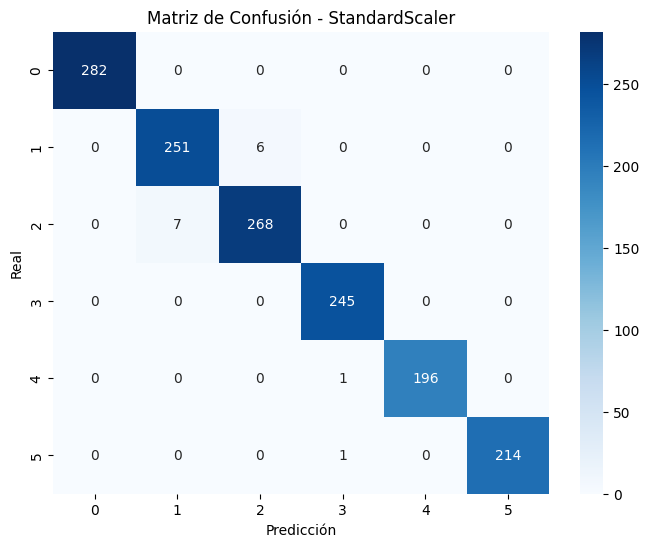

Entrenando modelo con RobustScaler...
Epoch 1/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7578 - loss: 0.6685
Epoch 2/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9625 - loss: 0.1117
Epoch 3/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9857 - loss: 0.0496
Epoch 4/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9880 - loss: 0.0363
Epoch 5/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9758 - loss: 0.0778
Epoch 6/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9915 - loss: 0.0229
Epoch 7/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9963 - loss: 0.0125
Epoch 8/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9979 - loss: 0.0074
Epoch 9/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9989 - loss: 0.0046
Epoch 10/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9995 - loss: 0.0021
Epoch 11/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9976 - loss: 0.0066
Epoch 12/20
18

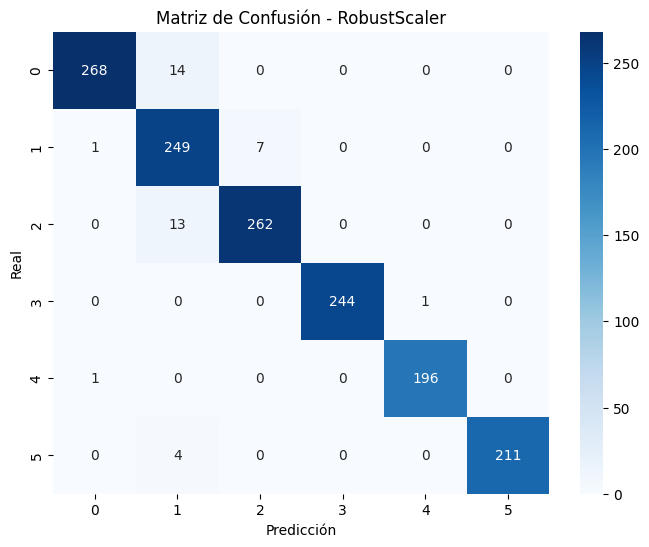

Entrenando modelo con PCA Standard...
Epoch 1/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7335 - loss: 0.6862
Epoch 2/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9479 - loss: 0.1369
Epoch 3/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9591 - loss: 0.1029
Epoch 4/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9637 - loss: 0.0886
Epoch 5/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9758 - loss: 0.0605
Epoch 6/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9796 - loss: 0.0532
Epoch 7/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9840 - loss: 0.0506
Epoch 8/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9912 - loss: 0.0296
Epoch 9/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9890 - loss: 0.0310
Epoch 10/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9937 - loss: 0.0201
Epoch 11/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9968 - loss: 0.0160
Epoch 12/20
18

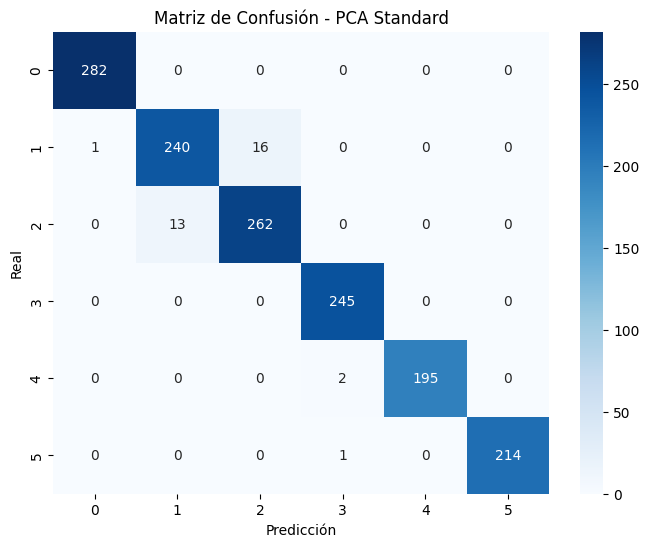

Entrenando modelo con PCA Robust...
Epoch 1/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6498 - loss: 0.8915
Epoch 2/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8693 - loss: 0.3105
Epoch 3/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8919 - loss: 0.2511
Epoch 4/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9072 - loss: 0.2155
Epoch 5/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9218 - loss: 0.1776
Epoch 6/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9211 - loss: 0.1770
Epoch 7/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9258 - loss: 0.1674
Epoch 8/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9325 - loss: 0.1552
Epoch 9/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9295 - loss: 0.1610
Epoch 10/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9341 - loss: 0.1473
Epoch 11/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9381 - loss: 0.1362
Epoch 12/20
184/

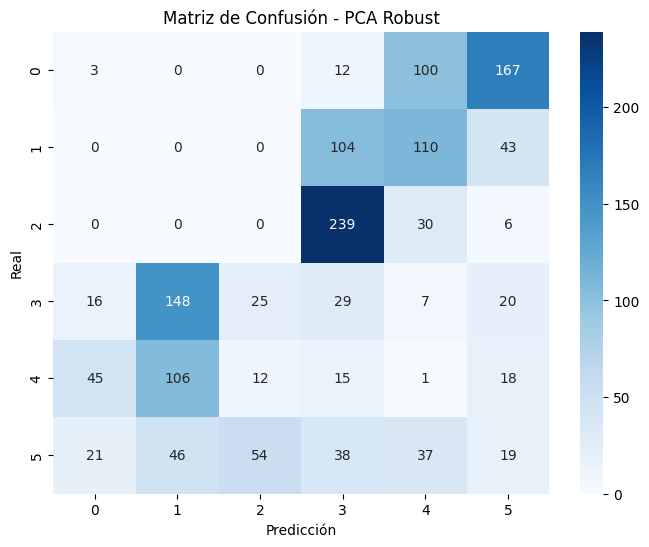

Entrenando modelo con KMeans Standard...
Epoch 1/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7777 - loss: 0.5656
Epoch 2/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9602 - loss: 0.1029
Epoch 3/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9763 - loss: 0.0609
Epoch 4/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9842 - loss: 0.0490
Epoch 5/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9841 - loss: 0.0410
Epoch 6/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9868 - loss: 0.0321
Epoch 7/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9890 - loss: 0.0335
Epoch 8/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9879 - loss: 0.0289
Epoch 9/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9781 - loss: 0.0662
Epoch 10/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9907 - loss: 0.0315
Epoch 11/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9887 - loss: 0.0374
Epoch 12/20

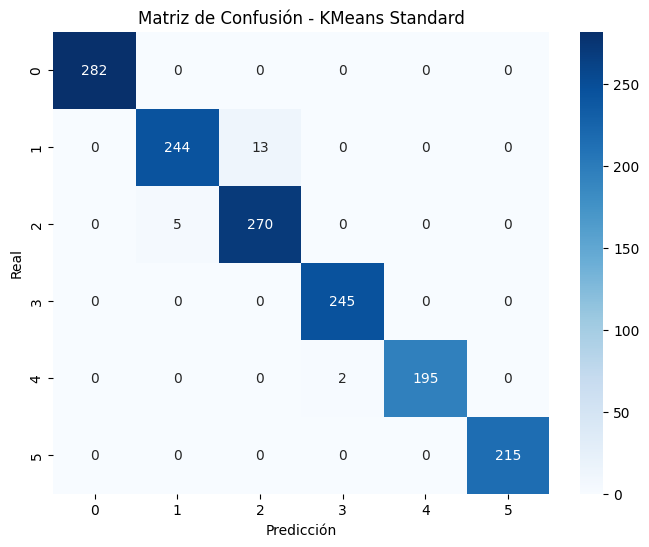

Entrenando modelo con KMeans Robust...
Epoch 1/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7317 - loss: 0.7697
Epoch 2/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9593 - loss: 0.1066
Epoch 3/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9796 - loss: 0.0579
Epoch 4/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9784 - loss: 0.0606
Epoch 5/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9901 - loss: 0.0282
Epoch 6/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9899 - loss: 0.0331
Epoch 7/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9957 - loss: 0.0150
Epoch 8/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9933 - loss: 0.0216
Epoch 9/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9950 - loss: 0.0184
Epoch 10/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9987 - loss: 0.0066
Epoch 11/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9978 - loss: 0.0081
Epoch 12/20
1

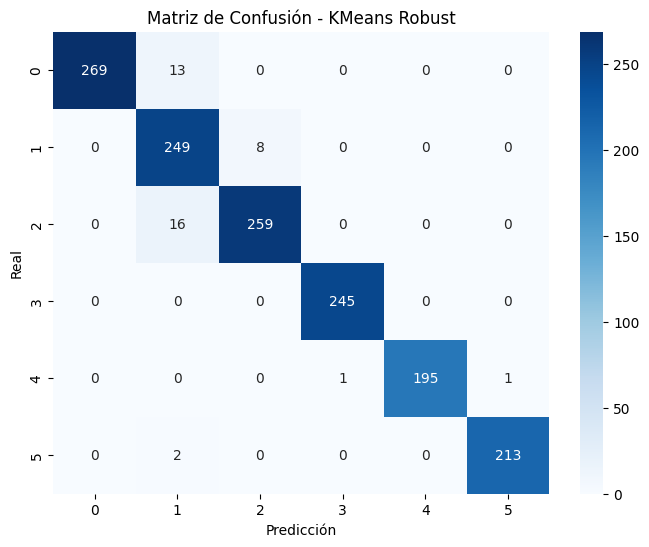

In [116]:
# Crear una lista vacía para almacenar los resultados
resultados = []

# Entrenar y evaluar el modelo para StandardScaler
history_standard, accuracy_standard, precision_standard, recall_standard, f1_standard, time_standard = entrenar_y_evaluar(
    crear_mlp(X_train_standard.shape[1]), X_train_standard, y_train, X_test_standard, y_test, 'StandardScaler'
)
resultados.append({'Modelo': 'MLP', 'Escalador': 'StandardScaler', 'Precisión': accuracy_standard, 
                    'Precisión (weighted)': precision_standard, 'Recall (weighted)': recall_standard, 
                    'F1-score (weighted)': f1_standard, 'Tiempo de Entrenamiento (segundos)': time_standard})

# Entrenar y evaluar el modelo para RobustScaler
history_robust, accuracy_robust, precision_robust, recall_robust, f1_robust, time_robust = entrenar_y_evaluar(
    crear_mlp(X_train_robust.shape[1]), X_train_robust, y_train, X_test_robust, y_test, 'RobustScaler'
)
resultados.append({'Modelo': 'MLP', 'Escalador': 'RobustScaler', 'Precisión': accuracy_robust, 
                    'Precisión (weighted)': precision_robust, 'Recall (weighted)': recall_robust, 
                    'F1-score (weighted)': f1_robust, 'Tiempo de Entrenamiento (segundos)': time_robust})

# Entrenar y evaluar el modelo para PCA con StandardScaler
history_pca_standard, accuracy_pca_standard, precision_pca_standard, recall_pca_standard, f1_pca_standard, time_pca_standard = entrenar_y_evaluar(
    crear_mlp(X_pca_standard.shape[1]), X_pca_standard, y_train, X_test_pca_standard, y_test, 'PCA Standard'
)
resultados.append({'Modelo': 'MLP', 'Escalador': 'PCA Standard', 'Precisión': accuracy_pca_standard, 
                    'Precisión (weighted)': precision_pca_standard, 'Recall (weighted)': recall_pca_standard, 
                    'F1-score (weighted)': f1_pca_standard, 'Tiempo de Entrenamiento (segundos)': time_pca_standard})

# Entrenar y evaluar el modelo para PCA con RobustScaler
history_pca_robust, accuracy_pca_robust, precision_pca_robust, recall_pca_robust, f1_pca_robust, time_pca_robust = entrenar_y_evaluar(
    crear_mlp(X_pca_robust.shape[1]), X_pca_robust, y_train, X_test_pca_robust, y_test, 'PCA Robust'
)
resultados.append({'Modelo': 'MLP', 'Escalador': 'PCA Robust', 'Precisión': accuracy_pca_robust, 
                    'Precisión (weighted)': precision_pca_robust, 'Recall (weighted)': recall_pca_robust, 
                    'F1-score (weighted)': f1_pca_robust, 'Tiempo de Entrenamiento (segundos)': time_pca_robust})

# Entrenar y evaluar el modelo para KMeans con StandardScaler
history_kmeans_standard, accuracy_kmeans_standard, precision_kmeans_standard, recall_kmeans_standard, f1_kmeans_standard, time_kmeans_standard = entrenar_y_evaluar(
    crear_mlp(X_train_kmeans_standard.shape[1]), X_train_kmeans_standard, y_train, X_test_kmeans_standard, y_test, 'KMeans Standard'
)
resultados.append({'Modelo': 'MLP', 'Escalador': 'KMeans Standard', 'Precisión': accuracy_kmeans_standard, 
                    'Precisión (weighted)': precision_kmeans_standard, 'Recall (weighted)': recall_kmeans_standard, 
                    'F1-score (weighted)': f1_kmeans_standard, 'Tiempo de Entrenamiento (segundos)': time_kmeans_standard})

# Entrenar y evaluar el modelo para KMeans con RobustScaler
history_kmeans_robust, accuracy_kmeans_robust, precision_kmeans_robust, recall_kmeans_robust, f1_kmeans_robust, time_kmeans_robust = entrenar_y_evaluar(
    crear_mlp(X_train_kmeans_robust.shape[1]), X_train_kmeans_robust, y_train, X_test_kmeans_robust, y_test, 'KMeans Robust'
)
resultados.append({'Modelo': 'MLP', 'Escalador': 'KMeans Robust', 'Precisión': accuracy_kmeans_robust, 
                    'Precisión (weighted)': precision_kmeans_robust, 'Recall (weighted)': recall_kmeans_robust, 
                    'F1-score (weighted)': f1_kmeans_robust, 'Tiempo de Entrenamiento (segundos)': time_kmeans_robust})

# Crear el DataFrame a partir de la lista de resultados
df_resultado = pd.DataFrame(resultados)


In [117]:
# Mostrar el DataFrame con los resultados
print(df_resultado)

  Modelo        Escalador  Precisión  Precisión (weighted)  Recall (weighted)  \
0    MLP   StandardScaler   0.989803              0.989817           0.989803   
1    MLP     RobustScaler   0.972128              0.973692           0.972128   
2    MLP     PCA Standard   0.977566              0.977571           0.977566   
3    MLP       PCA Robust   0.035350              0.028461           0.035350   
4    MLP  KMeans Standard   0.986404              0.986555           0.986404   
5    MLP    KMeans Robust   0.972128              0.973696           0.972128   

   F1-score (weighted)  Tiempo de Entrenamiento (segundos)  
0             0.989804                           10.856052  
1             0.972489                           11.473339  
2             0.977542                            9.124297  
3             0.029235                            8.203641  
4             0.986394                           10.967784  
5             0.972466                            9.742781  


5. Graficamos las curvas de aprendizaje

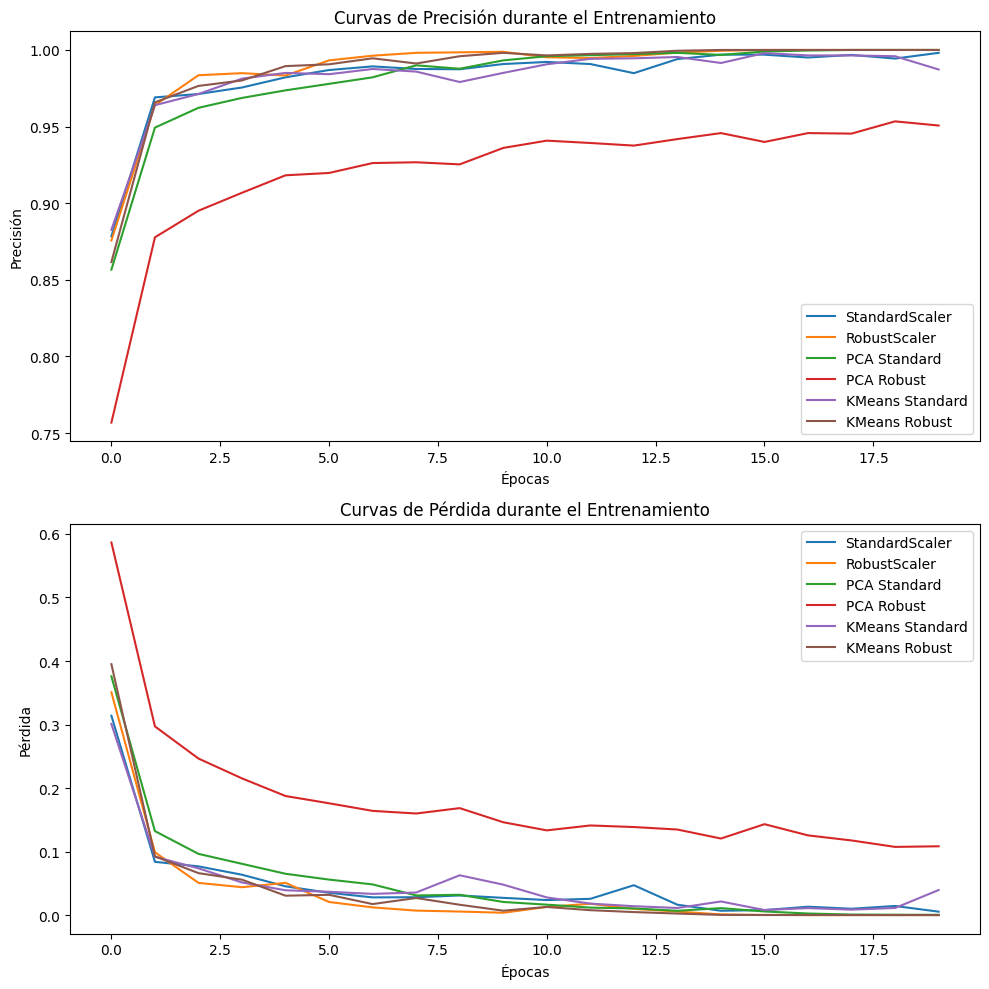

In [120]:
# Graficar las curvas de aprendizaje
graficar_curvas_aprendizaje(
    history_standard, history_robust, history_pca_standard, history_pca_robust, history_kmeans_standard, history_kmeans_robust
)

***
### Conclusión

* El análisis de clusters y la reducción de dimensionalidad mediante PCA proporcionaron resultados mixtos.
* El uso de KMeans, tanto con StandardScaler como con RobustScaler, mostró un buen desempeño con una precisión cercana al 98%, lo que sugiere que los clusters generados por estos enfoques pueden haber agrupado de manera efectiva las actividades según las características sensoriales.
* Sin embargo, los resultados con PCA, especialmente con el PCA Robust, no fueron satisfactorios, lo que indica que la reducción de la dimensionalidad no ha capturado suficientemente bien las relaciones entre las variables para las actividades físicas. Es posible que algunas características importantes se hayan perdido en este proceso.
* Los modelos de PCA estándar y robusto también reflejan una menor precisión, lo que resalta la importancia de explorar con más detalle las características relevantes antes de aplicar PCA, especialmente en contextos de datos complejos como los de las actividades físicas.

### Importancia de las características:
A partir de los resultados, las características generadas o utilizadas para los métodos de clustering, como los valores asociados a las señales sensoriales, parecen tener un impacto importante en la clasificación de las actividades.

Las diferencias en la precisión entre el StandardScaler y el RobustScaler indican que el tipo de preprocesamiento de los datos es crucial para optimizar el rendimiento.

Las transformaciones de escalado y la normalización adecuadas parecen mejorar la capacidad de los modelos para diferenciar correctamente entre las actividades.

### Rendimiento del MLP:
En cuanto al rendimiento del MLP (Perceptrón Multicapa), los resultados muestran una precisión sobresaliente con el uso de StandardScaler, logrando un 98.98% de precisión, lo que sugiere que el modelo es eficaz para predecir actividades físicas basadas en los datos sensoriales disponibles.

Sin embargo, el desempeño con PCA Robust fue extremadamente bajo, lo que podría deberse a la pérdida de información relevante durante el proceso de reducción de dimensiones. Para mejorar el rendimiento del MLP, sería útil explorar diferentes arquitecturas del modelo (por ejemplo, aumentando la cantidad de capas o neuronas), así como realizar un ajuste más fino de los hiperparámetros. Además, la integración de técnicas de regularización, como el dropout o la normalización de lotes, podría ayudar a mejorar la capacidad de generalización del modelo.

### Mejoras posibles:
El enfoque con MLP es adecuado para tareas de clasificación basadas en datos sensoriales, pero la falta de consistencia en los resultados con PCA y la baja precisión en el modelo con PCA Robust sugieren que una mejora en la selección de características o el ajuste de la estructura del modelo sería beneficioso. Además, podría explorarse el uso de técnicas adicionales de preprocesamiento de datos y ajuste de hiperparámetros para obtener mejores resultados. Un enfoque híbrido que combine las fortalezas del análisis no supervisado y el aprendizaje supervisado podría ser más robusto y capaz de aprovechar mejor la información contenida en los datos sensoriales.